In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel('dfa_analysis_data.xlsx', sheet_name='factors')
df.set_index('Date', inplace=True)
df.head()


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0289,-0.0255,-0.0239,0.0022
1926-08-31,0.0264,-0.0114,0.0381,0.0025
1926-09-30,0.0038,-0.0136,0.0005,0.0023
1926-10-31,-0.0327,-0.0014,0.0082,0.0032
1926-11-30,0.0254,-0.0011,-0.0061,0.0031


### 1. The Factors

Calculate their univariate performance statistics:

mean
volatility
Sharpe
VaR(.05)
Report these for the following three subsamples:

Beginning - 1980

1981 - 2001

2002 - End

In [20]:
# Define the subsample date ranges
# Beginning - 1980: everything up through 1980-12-31
df1 = df.loc[:'1980-12-31']
# 1981 - 2001: 1981-01-01 through 2001-12-31
df2 = df.loc['1981-01-01':'2001-12-31']
# 2002 - End: 2002-01-01 and later
df3 = df.loc['2002-01-01':]

# Calculate stats for each subsample
def get_stats(subdf):
    mean = subdf.mean() * 12
    vol = subdf.std() * np.sqrt(12)
    sharpe = mean / vol
    VaR = subdf.quantile(.05)
    return mean, vol, sharpe, VaR

mean1, vol1, sharpe1, VaR1 = get_stats(df1)
mean2, vol2, sharpe2, VaR2 = get_stats(df2)
mean3, vol3, sharpe3, VaR3 = get_stats(df3)

In [17]:
print("=== Beginning - 1980 ===")
print("Mean:\n", mean1)
print("Volatility:\n", vol1)
print("Sharpe:\n", sharpe1)
print("VaR(.05):\n", VaR1)

=== Beginning - 1980 ===
Mean:
 Mkt-RF    0.080958
SMB       0.033914
HML       0.050321
RF        0.027730
dtype: float64
Volatility:
 Mkt-RF    0.204988
SMB       0.114277
HML       0.134228
RF        0.007673
dtype: float64
Sharpe:
 Mkt-RF    0.394938
SMB       0.296769
HML       0.374893
RF        3.614032
dtype: float64
VaR(.05):
 Mkt-RF   -0.084090
SMB      -0.041875
HML      -0.044245
RF        0.000000
Name: 0.05, dtype: float64


In [18]:
print("\n=== 1981 - 2001 ===")
print("Mean:\n", mean2)
print("Volatility:\n", vol2)
print("Sharpe:\n", sharpe2)
print("VaR(.05):\n", VaR2)


=== 1981 - 2001 ===
Mean:
 Mkt-RF    0.077852
SMB      -0.002014
HML       0.064557
RF        0.063081
dtype: float64
Volatility:
 Mkt-RF    0.157183
SMB       0.117260
HML       0.109863
RF        0.007752
dtype: float64
Sharpe:
 Mkt-RF    0.495298
SMB      -0.017178
HML       0.587613
RF        8.137239
dtype: float64
VaR(.05):
 Mkt-RF   -0.064135
SMB      -0.045880
HML      -0.041640
RF        0.002455
Name: 0.05, dtype: float64


In [19]:
print("\n=== 2002 - End ===")
print("Mean:\n", mean3)
print("Volatility:\n", vol3)
print("Sharpe:\n", sharpe3)
print("VaR(.05):\n", VaR3)


=== 2002 - End ===
Mean:
 Mkt-RF    0.091306
SMB       0.007931
HML       0.001204
RF        0.015837
dtype: float64
Volatility:
 Mkt-RF    0.153529
SMB       0.088448
HML       0.106442
RF        0.005213
dtype: float64
Sharpe:
 Mkt-RF    0.594711
SMB       0.089669
HML       0.011313
RF        3.038090
dtype: float64
VaR(.05):
 Mkt-RF   -0.077265
SMB      -0.039195
HML      -0.041485
RF        0.000000
Name: 0.05, dtype: float64


### 2.

Based on the factor statistics above, answer the following.

Does each factor have a premium (positive expected excess return) in each subsample?

Does the premium to the size factor get smaller after 1980?

Does the premium to the value factor get smaller during the 1990’s?

How have the factors performed since the time of the case, (2002-present)?

### Answers to 2

1. The SMB factor in the 2nd subsample does not have a premium. The others do in all subsamples.
2. The SMB factor gets smaller (goes negative) after 1980, but then jumps up to .007 in the 2002 & on subset.
3. The 90s are included in the second subsample along with the 80s. The factor premium stays similar from the 80s through the 90s & drops heavily in the 2000s.
4. The mkt return factor has increased in the 3rd subsample, while the other two are close to zero.

### 3.

The factors are constructed in such a way as to reduce correlation between them.

Report the correlation matrix across the three factors.
Does the construction method succeed in keeping correlations small?
Does it achieve this in each subsample?


==== All Data ====
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.320443  0.227832
SMB     0.320443  1.000000  0.125828
HML     0.227832  0.125828  1.000000


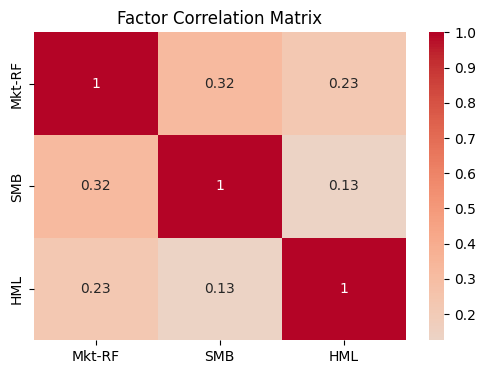

In [36]:
cor_matrix = df[['Mkt-RF', 'SMB', 'HML']].corr()
print("==== All Data ====")
print(cor_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Correlation Matrix")
plt.show()



==== Start - 1980 ====
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.374234  0.442341
SMB     0.374234  1.000000  0.313397
HML     0.442341  0.313397  1.000000


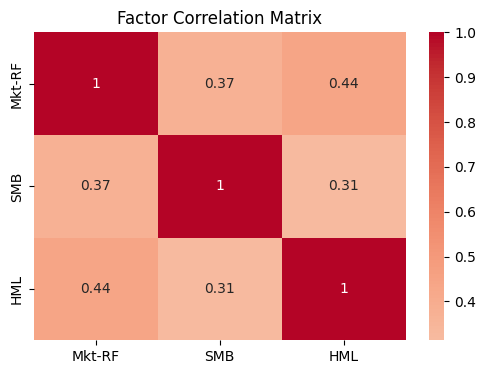

In [39]:
cor_matrix = df1[['Mkt-RF', 'SMB', 'HML']].corr()
print("==== Start - 1980 ====")
print(cor_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Correlation Matrix")
plt.show()

==== Start - 1980 ====
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.158652 -0.529912
SMB     0.158652  1.000000 -0.445451
HML    -0.529912 -0.445451  1.000000


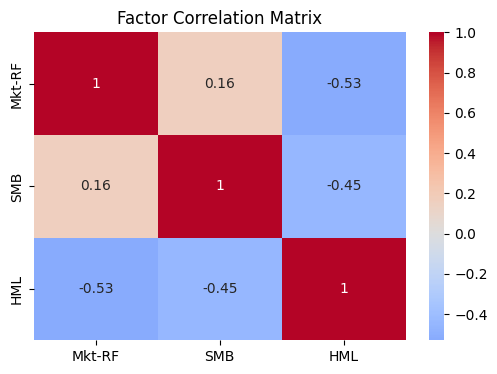

In [38]:
cor_matrix = df2[['Mkt-RF', 'SMB', 'HML']].corr()
print("==== Start - 1980 ====")
print(cor_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Correlation Matrix")
plt.show()

==== 2002 - Present ====
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.316034  0.109671
SMB     0.316034  1.000000  0.116227
HML     0.109671  0.116227  1.000000


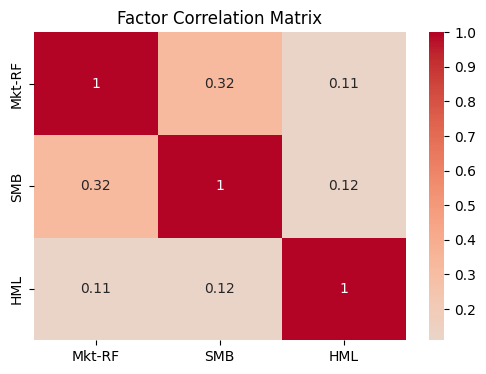

In [41]:
cor_matrix = df3[['Mkt-RF', 'SMB', 'HML']].corr()
print("==== 2002 - Present ====")
print(cor_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Correlation Matrix")
plt.show()

### Answers to 3

In the large sample, correlations are pretty low (~.30).
In the individual subsamples, the 2nd subsample (1981 - 1990) had the value factor more (negatively) correlated with the two others. In the 1st & 3rd subsamples, these correlations were capped at around (~.30)